In [2]:
import torch
import networkx as nx
import numpy as np
from math import comb

In [3]:
G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

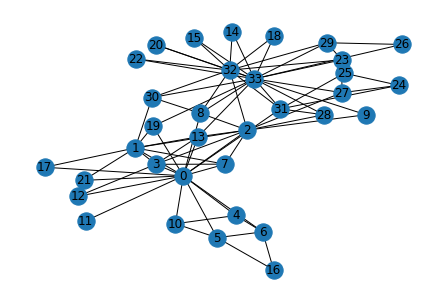

In [4]:
nx.draw(G, with_labels = True)

In [5]:
def average_degree(num_endges, num_nodes):
    average_degree = (2*num_endges)/num_nodes
    return round(average_degree)
    

In [6]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [7]:
np.mean(np.array(G.degree)[:,1])

4.588235294117647

In [8]:
def average_clustering_coeff(G):
    
    default = nx.average_clustering(G)
    return  default

In [9]:
average_clustering_coeff(G)

0.5706384782076823

In [10]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [11]:
nx.average_clustering(G)

0.5706384782076823

In [12]:
nx.triangles(G)

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

In [13]:
for n in G.neighbors(0):
    print(n)

1
2
3
4
5
6
7
8
10
11
12
13
17
19
21
31


In [91]:
def one_iter_pagerank(G, beta, r0, node_id, max_iter = 1):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    r1 = 0
    

    ############# Your code here ############
    ## Note: 
    ## 1: You should not use nx.pagerank
    num_nodes = G.number_of_nodes()
    A = nx.to_numpy_array(G)
    x = np.sum(A,axis=1)
    x = x.reshape(num_nodes,1)
    M = np.transpose(A/x)
    G = beta*A + ((1-beta)*(np.ones((num_nodes, num_nodes)))*(1/num_nodes))
    rank = r0*(np.ones((num_nodes, 1)))
    # print(rank)
    for i in range(max_iter):
        rank = G.dot(rank)
        

    #########################################
    r1 = rank[node_id,0]
    print(rank)
    return r1

In [92]:
beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

[[0.12810458]
 [0.06147059]
 [0.05663399]
 [0.0346732 ]
 [0.02107843]
 [0.03284314]
 [0.03284314]
 [0.01624183]
 [0.0189331 ]
 [0.00961938]
 [0.02107843]
 [0.00735294]
 [0.01127451]
 [0.01762591]
 [0.00922722]
 [0.00922722]
 [0.01764706]
 [0.00996732]
 [0.00922722]
 [0.0113514 ]
 [0.00922722]
 [0.00996732]
 [0.00922722]
 [0.02883506]
 [0.02352941]
 [0.02235294]
 [0.01314879]
 [0.0221684 ]
 [0.01354095]
 [0.02569781]
 [0.01654748]
 [0.03422722]
 [0.09354095]
 [0.14156863]]
The PageRank value for node 0 after one iteration is 0.1281045751633987


In [90]:
one_iter_pagerank(G, beta, r0, node, max_iter=1000)

[[0.09455874]
 [0.05152249]
 [0.05510966]
 [0.03520652]
 [0.02255585]
 [0.02965332]
 [0.02965332]
 [0.02429304]
 [0.02920405]
 [0.01491855]
 [0.02255585]
 [0.01061029]
 [0.01530449]
 [0.02892047]
 [0.01518071]
 [0.01518071]
 [0.01774368]
 [0.01519007]
 [0.01518071]
 [0.01981749]
 [0.01518071]
 [0.01519007]
 [0.01518071]
 [0.03138607]
 [0.02167922]
 [0.02158249]
 [0.01581552]
 [0.02572145]
 [0.01981579]
 [0.02652869]
 [0.02443314]
 [0.03672932]
 [0.07006401]
 [0.09833281]]


0.09455873790249271

In [83]:
nx.pagerank(G,alpha=0.8, max_iter=1000)

{0: 0.094561178981564,
 1: 0.05152334607950814,
 2: 0.05510962827358582,
 3: 0.035206868710526563,
 4: 0.022556530085318473,
 5: 0.02965434765152121,
 6: 0.02965434765152121,
 7: 0.02429306613631948,
 8: 0.029203590410895465,
 9: 0.014918270732782356,
 10: 0.022556530085318473,
 11: 0.010610337618460164,
 12: 0.01530458479594532,
 13: 0.028920243421725694,
 14: 0.015180200879547065,
 15: 0.015180200879547065,
 16: 0.01774436545128434,
 17: 0.01519007845263465,
 18: 0.015180200879547065,
 19: 0.019817255738040863,
 20: 0.015180200879547065,
 21: 0.01519007845263465,
 22: 0.015180200879547065,
 23: 0.03138523208020211,
 24: 0.021678994504154954,
 25: 0.021582293035938838,
 26: 0.015815184517974507,
 27: 0.025720946173829452,
 28: 0.019815535386497624,
 29: 0.026528036905982717,
 30: 0.02443262236845383,
 31: 0.03672846196415317,
 32: 0.07006405452640968,
 33: 0.09833298540908077}

In [15]:
A = nx.adjacency_matrix(G)

In [25]:
nx.to_numpy_array(G)[-1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.])

In [26]:
A.todense()[-1,:]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
         0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)